# Violent and Sexual Crime Rates by Municipality: The Netherlands, 2018

In [1]:
# Libararies
import pandas as pd
import numpy as np
# !conda install -c conda-forge geopandas=0.7.0
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Data & Pre-processing
The data is sourced from the Centraal Bureau voor de Statistiek, Den Haag/Heerlen and can be accessed from https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=84468NED&_theme=395.

In [12]:
# Access the raw data
df = pd.read_csv(r'C:\Users\murat\Downloads\84468NED_TypedDataSet_04012021_122231.csv', sep=';' , index_col=[0])
# Retain the columns of the analysis
df.drop(['WijkenEnBuurten', 'SoortRegio_2', 'Indelingswijziging_4', 'AantalInwoners_5',
       'TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27',
       'TotaalDiefstalUitWoningSchuurED_28',
       'VernielingMisdrijfTegenOpenbareOrde_29'], 
        axis=1, inplace=True)

# Remove white spaces from the categorical data
df['Codering_3'] = df['Codering_3'].str.strip()
df['Gemeentenaam_1'] = df['Gemeentenaam_1'].str.strip()

# Rename the columns
df.rename(columns = {'Gemeentenaam_1':'Municipality', 
                     'Codering_3' : 'Code', 
                     'GeweldsEnSeksueleMisdrijven_30' : 'Violent_and_sexual_crime'},
          inplace = True)
df.head()

,Municipality,Code,Violent_and_sexual_crime
ID,,,
0,Aa en Hunze,GM1680,3.0
1,Aa en Hunze,WK168000,2.0
2,Aa en Hunze,BU16800000,2.0
3,Aa en Hunze,BU16800009,0.0
4,Aa en Hunze,WK168001,1.0


In [4]:
# Obtain a dataframe of municipality by thier total crime rates recorded per 1000 inhabitants
df_groupby = df.groupby('Municipality')['Violent_and_sexual_crime'].sum().to_frame(name='Violen_and_sexual_crime').reset_index()
df_groupby

,Municipality,Violen_and_sexual_crime
0,'s-Gravenhage,2583.0
1,'s-Hertogenbosch,646.0
2,Aa en Hunze,151.0
3,Aalburg,45.0
4,Aalsmeer,61.0
...,...,...
375,Zundert,46.0
376,Zutphen,230.0
377,Zwartewaterland,129.0
378,Zwijndrecht,277.0


In [5]:
# Access the geographic information data from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
mapdata = gpd.read_file(geodata_url)
mapdata.head(1)

,id,statcode,statnaam,jrstatcode,rubriek,geometry
0,cbs_gemeente_2017_gegeneraliseerd.227609,GM0009,Ten Boer,2017GM0009,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245002...."


In [7]:
# Prepare the geographic data for merging:
## Clean white space and change data type from object to string 
mapdata['statnaam'] = mapdata['statnaam'].str.strip()
mapdata["statnaam"] = mapdata["statnaam"].astype('str')

### Merge data

In [8]:
# Join the geodataframe with the cleaned up csv dataframe
merged = mapdata.set_index('statnaam').join(df_groupby.set_index('Municipality'))
merged.head()

,id,statcode,jrstatcode,rubriek,geometry,Violen_and_sexual_crime
statnaam,,,,,,
Ten Boer,cbs_gemeente_2017_gegeneraliseerd.227609,GM0009,2017GM0009,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245002....",36.0
Krimpen aan den IJssel,cbs_gemeente_2017_gegeneraliseerd.227790,GM0542,2017GM0542,gemeente,"MULTIPOLYGON (((99430.740 436791.067, 99266.97...",23.0
Delfzijl,cbs_gemeente_2017_gegeneraliseerd.227610,GM0010,2017GM0010,gemeente,"MULTIPOLYGON (((262016.555 587782.309, 262403....",136.0
Veendam,cbs_gemeente_2017_gegeneraliseerd.227621,GM0047,2017GM0047,gemeente,"MULTIPOLYGON (((250623.405 572132.283, 249789....",163.0
Groningen,cbs_gemeente_2017_gegeneraliseerd.227611,GM0014,2017GM0014,gemeente,"MULTIPOLYGON (((243244.393 584002.790, 243811....",887.0


# Analysis

Perform data visualization for Total Violent and Sexual Crime rate per 1000 inhabitants in each municipality, according to police records.  

In [9]:
# Display the municipalities with the highest crime rates of violent and sexual crime
crimebym = df.groupby('Municipality')['Violent_and_sexual_crime'].sum().sort_values(ascending=False)
crimebym = pd.DataFrame(crimebym)
print("Number of Municipality: ", len(crimebym))
crimebym.head()

Number of Municipality:  380


,Violent_and_sexual_crime
Municipality,
Amsterdam,8427.0
's-Gravenhage,2583.0
Haarlemmermeer,2320.0
Tilburg,2280.0
Arnhem,1831.0


Among 380 municipality recordings, the ones with the highest rates for Violent & Sexual Crime per 1000 inhabitants are identified in the following order: Amsterdam (8427), 's-Gravenhage (2583), Haarlemmermeer (2320), Tilburg (2280), and Arnhem (1831). 

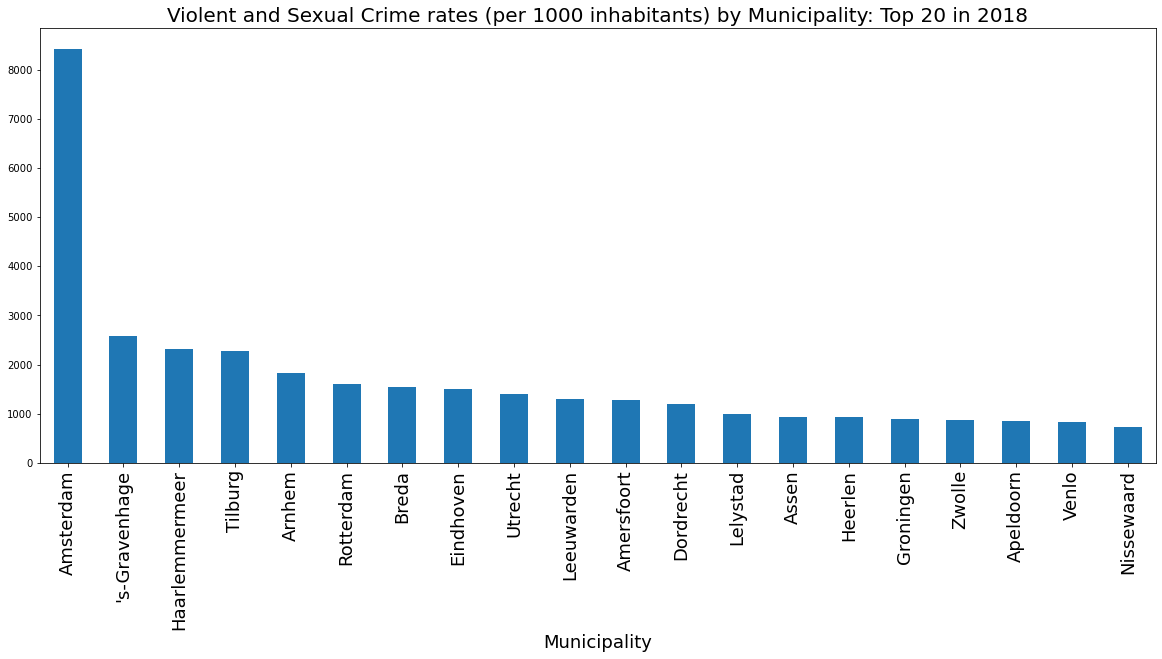

In [10]:
# Display the bar chart figure of the top 20 municipalities in term of crime rates
crimebym.head(20).plot(kind= 'bar', legend=False, figsize=(20,8))
plt.title('Violent and Sexual Crime rates (per 1000 inhabitants) by Municipality: Top 20 in 2018', 
          fontweight = 30, fontsize = 20)
plt.xlabel('Municipality', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 18)
plt.show()


### Mapping

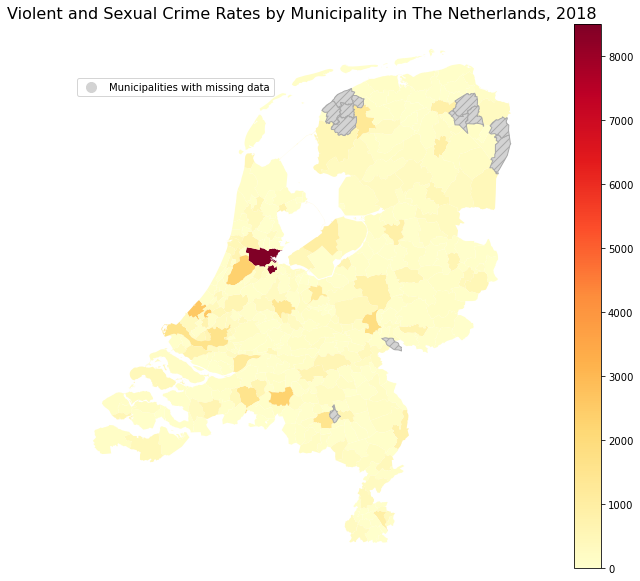

In [11]:
# Determine the size of the figure
fig, ax = plt.subplots(1, 1, figsize=[15,10])

# Create the map
nl_map = merged.plot(column='Violen_and_sexual_crime', 
                      ax=ax, 
                      cmap = 'YlOrRd', 
                      missing_kwds={'color': 'lightgrey', 'edgecolor': 'darkgrey', 
                                    'hatch': '///', 'label': 'Missing values'})
# Remove information from the axis
ax.axis('off')

# Create a colorbar as a legend
legend = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=8500))
fig.colorbar(legend)

# Create a patch for missing values
patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='lightgrey',
                 label= "Municipalities with missing data")
plt.legend(handles=patch, bbox_to_anchor=(0, 0.91),
           loc='upper left', ncol=2, facecolor=None, numpoints=1 )

# Add a title
ax.set_title('Violent and Sexual Crime Rates by Municipality in The Netherlands, 2018', fontsize=16)

# Save figure in the directory
fig.savefig('NL_crime_rates.png', dpi=300)

plt.show()